1.Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2.Passenger ID as Index

In [3]:
data.set_index('PassengerId', inplace=True)

In [4]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3.Basic details

In [5]:
data.shape

(891, 11)

In [6]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

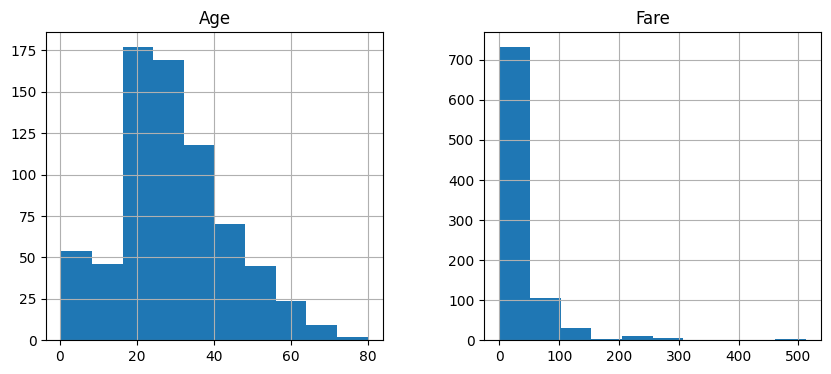

In [11]:
freqgraph = data.select_dtypes(include='float64')
freqgraph.hist(figsize=(10,4));


4.Missing values

In [12]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Embarked'].fillna('Unknown',inplace=True)
data['Cabin'].fillna('Unknown',inplace=True)

In [13]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

5.Outlier Detection

In [16]:
num_cols = ['Age','Fare','SibSp']

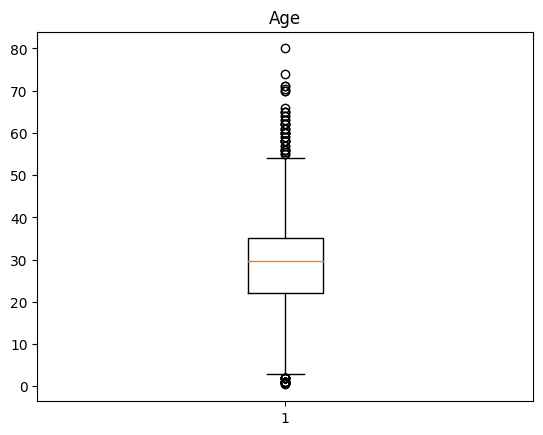

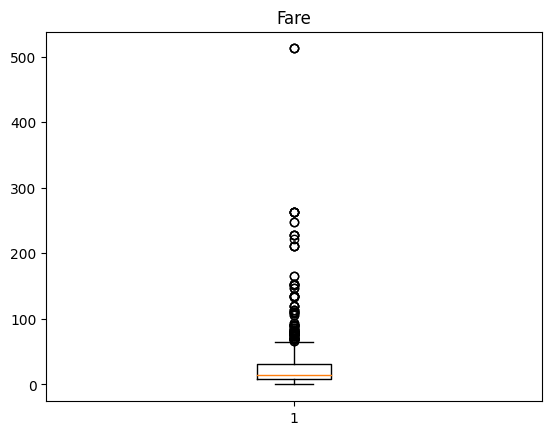

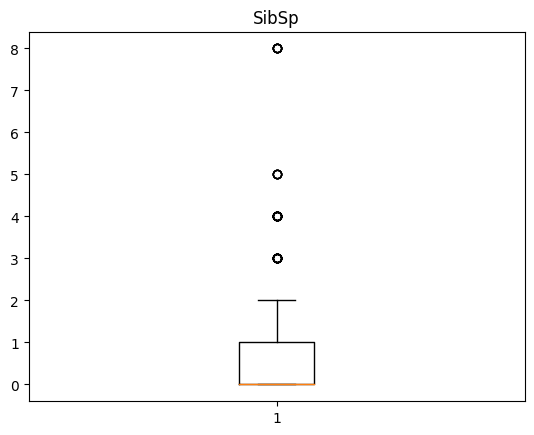

In [17]:
for i in num_cols:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

outlier detection of Age

In [18]:
Q1 = np.percentile(data['Age'],25,method='midpoint')
Q2 = np.percentile(data['Age'],50,method='midpoint')
Q3 = np.percentile(data['Age'],75,method='midpoint')

print('Q1 is ',Q1)
print('Q2 is ',Q2)
print('Q3 is ',Q3)

Q1 is  22.0
Q2 is  29.69911764705882
Q3 is  35.0


In [19]:
IQR = Q3-Q1

print('IQR is ',IQR)

IQR is  13.0


In [20]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5*IQR

print('lower limit is',low_lim)
print('upper limit is',up_lim)

lower limit is 2.5
upper limit is 54.5


In [22]:
outlier = []
for x in data['Age']:
  if (x > up_lim) or (x < low_lim):
    outlier.append(x)

outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [23]:
data['Age'] = data['Age'].clip(lower=low_lim, upper=up_lim)

In [24]:
outlier = []
for x in data['Age']:
  if (x > up_lim) or (x < low_lim):
    outlier.append(x)

outlier

[]

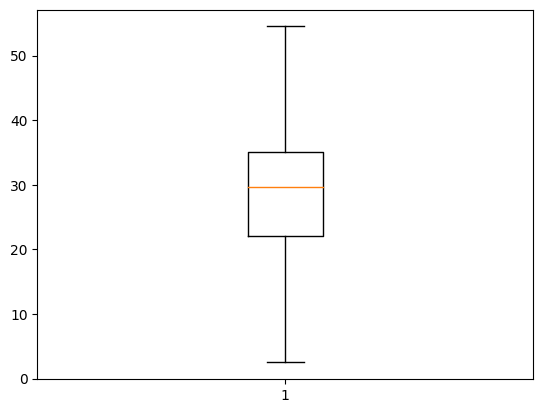

In [25]:
plt.boxplot(data['Age'])
plt.show();

outlier detection of Fare

In [26]:
Q1 = np.percentile(data['Fare'],25,method='midpoint')
Q2 = np.percentile(data['Fare'],50,method='midpoint')
Q3 = np.percentile(data['Fare'],75,method='midpoint')

print('Q1 is ',Q1)
print('Q2 is ',Q2)
print('Q3 is ',Q3)

Q1 is  7.9104
Q2 is  14.4542
Q3 is  31.0


In [27]:
IQR = Q3-Q1

print('IQR is ',IQR)

IQR is  23.0896


In [28]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5*IQR

print('lower limit is',low_lim)
print('upper limit is',up_lim)

lower limit is -26.724
upper limit is 65.6344


In [29]:
outlier = []
for x in data['Fare']:
  if (x > up_lim) or (x < low_lim):
    outlier.append(x)

outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [30]:
data['Fare'] = data['Fare'].clip(lower=low_lim, upper=up_lim)

In [31]:
outlier = []
for x in data['Fare']:
  if (x > up_lim) or (x < low_lim):
    outlier.append(x)

outlier

[]

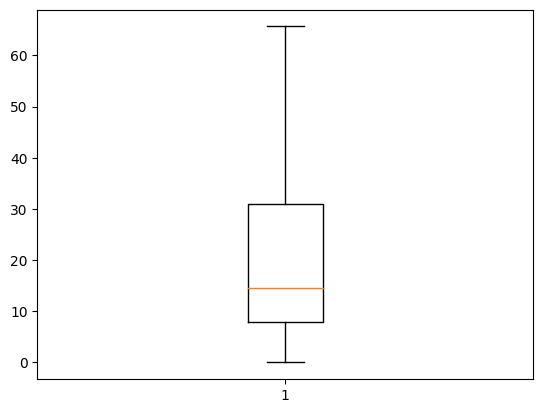

In [32]:
plt.boxplot(data['Fare'])
plt.show();

outlier detection of SibSp

In [33]:
Q1 = np.percentile(data['SibSp'],25,method='midpoint')
Q2 = np.percentile(data['SibSp'],50,method='midpoint')
Q3 = np.percentile(data['SibSp'],75,method='midpoint')

print('Q1 is ',Q1)
print('Q2 is ',Q2)
print('Q3 is ',Q3)

Q1 is  0.0
Q2 is  0.0
Q3 is  1.0


In [34]:
IQR = Q3-Q1

print('IQR is ',IQR)

IQR is  1.0


In [35]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5*IQR

print('lower limit is',low_lim)
print('upper limit is',up_lim)

lower limit is -1.5
upper limit is 2.5


In [36]:
outlier = []
for x in data['SibSp']:
  if (x > up_lim) or (x < low_lim):
    outlier.append(x)

outlier

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [37]:
data['SibSp'] = data['SibSp'].clip(lower=low_lim, upper=up_lim)

In [38]:
outlier = []
for x in data['SibSp']:
  if (x > up_lim) or (x < low_lim):
    outlier.append(x)

outlier

[]

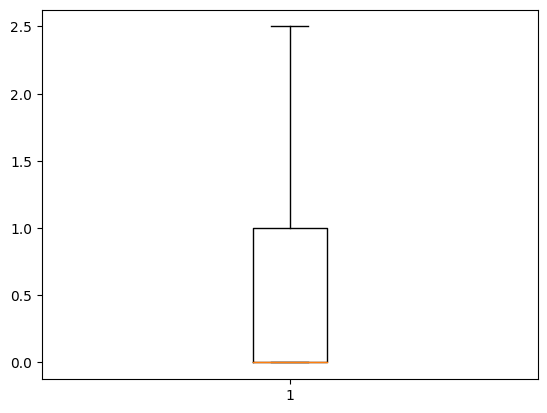

In [39]:
plt.boxplot(data['SibSp'])
plt.show();

6.Min-Max Scaling

In [44]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,Unknown,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,65.6344,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,Unknown,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,Unknown,S


In [48]:
from sklearn.preprocessing import MinMaxScaler
min_scaler = MinMaxScaler()

In [60]:
column_name = 'Survived'

In [63]:
column_data = data[['Survived']].values.reshape(-1,1)

In [65]:
column_scaled = min_scaler.fit_transform(column_data)

In [71]:
column_scaled_new = pd.DataFrame(column_scaled)
column_scaled_new.head(10)

,0
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
5,0.0
6,0.0
7,0.0
8,1.0
9,1.0
